<a href="https://colab.research.google.com/github/JorgeAccardi/portafolio/blob/main/An%C3%A1lisis_de_Ventas_Online_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🔍🧹 Módulo 1: Inspección y Limpieza de Datos

# Análisis de Ventas - Online Retail

## Introducción

En este análisis, exploraremos el dataset **Online Retail**, que contiene datos de transacciones de una tienda en línea. Realizaremos una inspección inicial de los datos, limpiaremos cualquier valor erróneo o nulo, y luego exploraremos patrones de ventas, precios y comportamiento de los clientes.


##Carga de datos

In [1]:
import pandas as pd

# Cargar el archivo Excel
df = pd.read_excel('/content/Online Retail.xlsx')

# Ver las primeras filas del dataset
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Inspección general de los datos


In [19]:
# Ver la estructura general del dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


## Estadísticas descriptivas


In [16]:
# Estadísticas descriptivas de las columnas numéricas
df.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397884.000000,397884,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,179.331775,NaN,22.097877,1713.141560


## Valores nulos en el dataset


In [17]:
# Ver cuántos valores nulos hay en cada columna
df.isnull().sum()


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


## Eliminación de filas con descripciones nulas

Eliminamos las filas que no tienen descripción de producto, ya que son pocas y no aportan información útil.


In [6]:
# Eliminamos filas con descripción nula
df = df[df['Description'].notnull()]

## Eliminación de registros con precios o cantidades negativas

Eliminamos registros donde la cantidad o el precio unitario son negativos, ya que no representan ventas válidas.


In [14]:
# Filtramos los registros con cantidad y precio positivos
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

## Eliminación de registros sin `CustomerID`

Para poder analizar el comportamiento de los clientes, eliminamos registros donde no se conoce el ID del cliente.


In [15]:
# Eliminamos registros con CustomerID nulo
df = df[df['CustomerID'].notnull()]

## Tamaño del dataset limpio

Después de eliminar registros nulos y valores inválidos, verificamos cuántas filas y columnas conserva el dataset.


In [18]:
# Ver tamaño actual del dataset limpio
df.shape


(397884, 8)

#📊 Módulo 2: Análisis Exploratorio de Datos (EDA)

## Creación de columna de ingresos por transacción

Creamos una columna nueva llamada `TotalPrice` que representa el ingreso generado en cada fila del dataset (producto * cantidad).


In [22]:
# Crear columna de ingresos
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


## Ingreso total del negocio

Calculamos el ingreso total generado por todas las transacciones registradas en el dataset.


In [23]:
# Calcular ingreso total
total_ventas = df['TotalPrice'].sum()
print(f"Ingreso total: £{total_ventas:,.2f}")

Ingreso total: £8,911,407.90


## Evolución de las ventas por mes

Agrupamos los datos por mes para visualizar cómo variaron las ventas a lo largo del tiempo.


## 📈 Evolución mensual de las ventas

En este análisis agrupamos las transacciones por mes para visualizar cómo evolucionaron las ventas a lo largo del tiempo.

### 🔍 ¿Qué hicimos paso a paso?

1. **Conversión de fechas**: Convertimos la columna `InvoiceDate` a formato `datetime` para poder trabajar con fechas.
2. **Agrupación por mes**: Creamos una nueva columna `YearMonth` con el año y mes de cada transacción (por ejemplo: `2011-12`).
3. **Suma de ventas mensuales**: Agrupamos todas las filas por mes y sumamos los valores de la columna `TotalPrice`, que representa el ingreso generado por cada transacción.
4. **Visualización**: Graficamos los ingresos mensuales en un gráfico de líneas para detectar tendencias o estacionalidades.

### 📌 ¿Qué buscamos ver?

- Tendencias de crecimiento o caída a lo largo del año.
- Estacionalidad (por ejemplo, aumento de ventas en noviembre-diciembre).
- Posibles picos que nos permitan investigar causas o campañas exitosas.


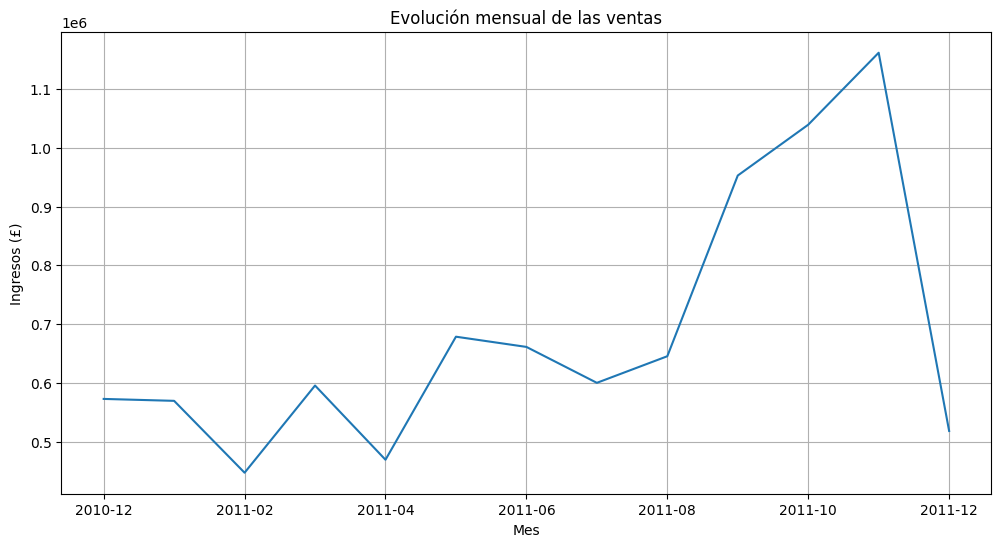

In [27]:
import matplotlib.pyplot as plt

# Aseguramos que InvoiceDate esté en formato datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Creamos una nueva columna con año y mes
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Agrupamos las ventas por mes
ventas_mensuales = df.groupby('YearMonth')['TotalPrice'].sum()

# Convertimos el índice a string para plotear
ventas_mensuales.index = ventas_mensuales.index.astype(str)

# Visualizamos
ventas_mensuales.plot(kind='line', figsize=(12, 6), title='Evolución mensual de las ventas')
plt.xlabel('Mes')
plt.ylabel('Ingresos (£)')
plt.grid(True)
plt.show()
